<a href="https://colab.research.google.com/github/ugrcnylmz/Assingment/blob/main/DL_Assignment_1_(Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
df.shape

(10000, 13)

In [9]:
df.isnull().sum().any()

False

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


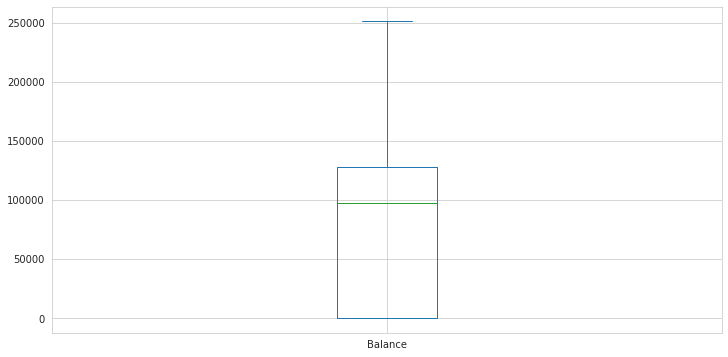

In [12]:
df.Balance.plot(kind="box")

In [13]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


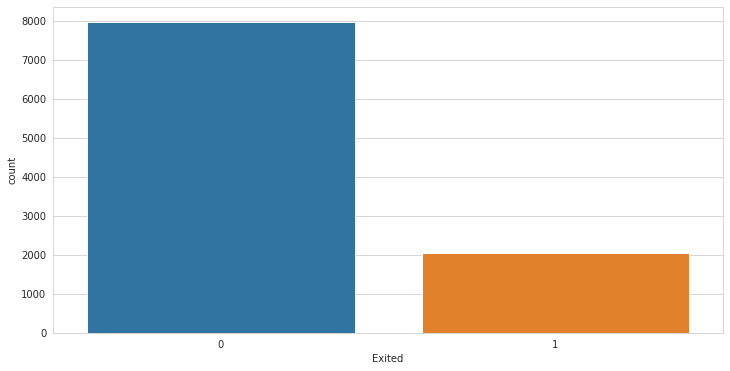

In [14]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

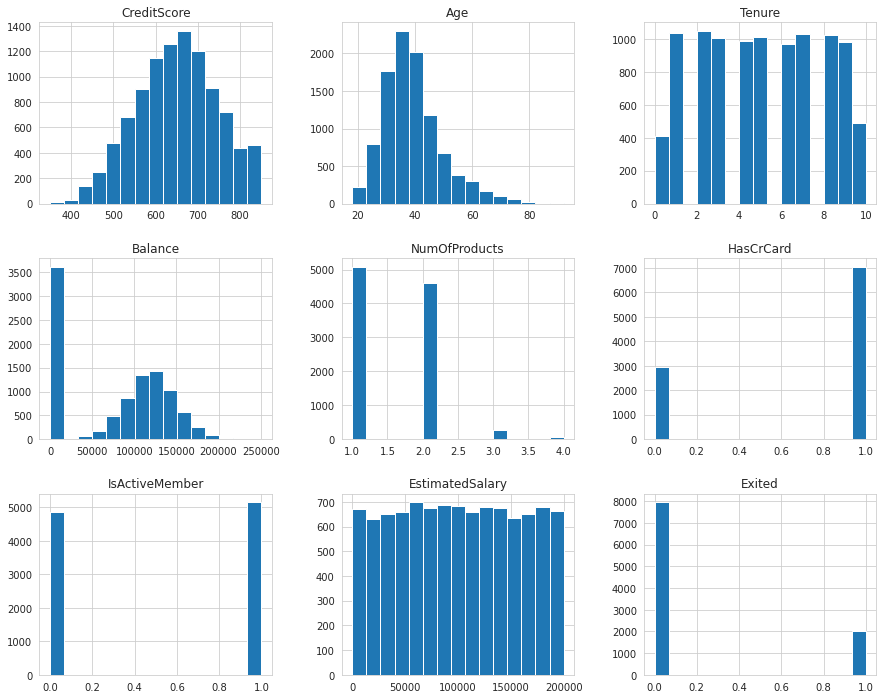

In [15]:
df.hist(figsize=(15, 12), bins=15);


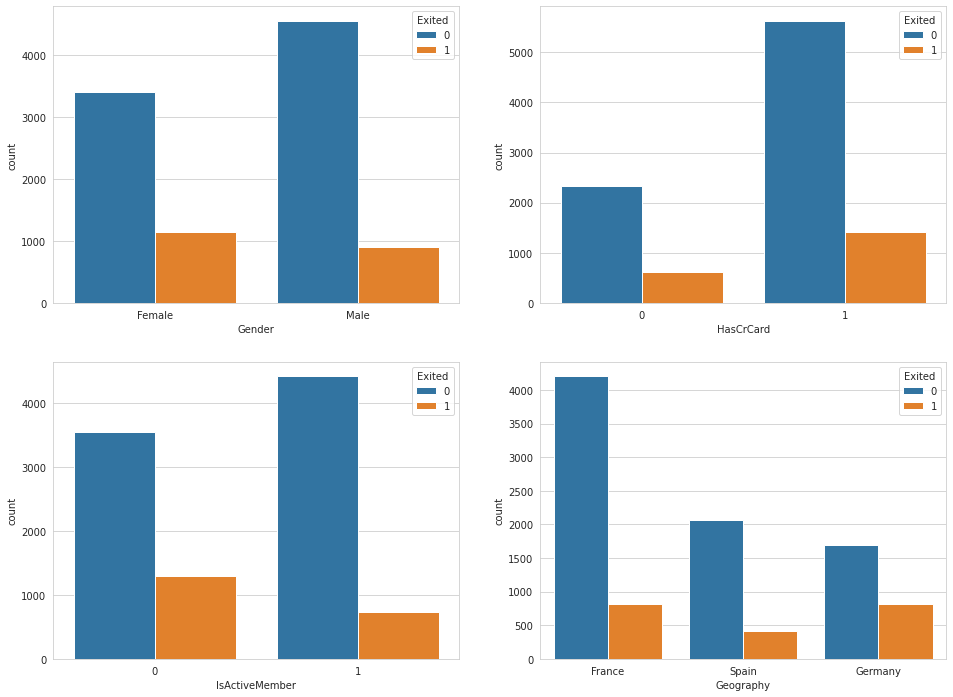

In [16]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

In [17]:
df.groupby("Age")["Exited"].value_counts()


Age  Exited
18   0         20
     1          2
19   0         26
     1          1
20   0         38
               ..
84   0          1
     1          1
85   0          1
88   0          1
92   0          2
Name: Exited, Length: 128, dtype: int64

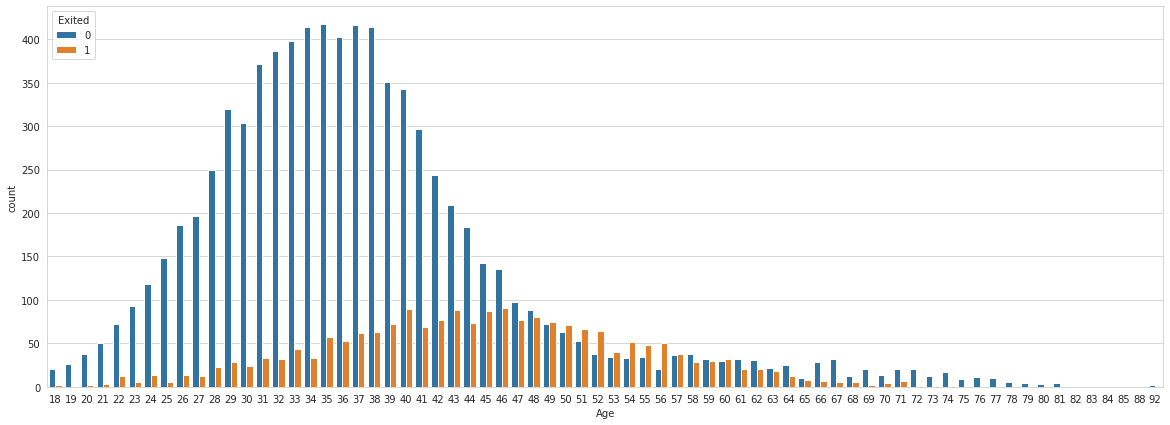

In [18]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

In [19]:
df.CreditScore.describe()

count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: CreditScore, dtype: float64

In [20]:
def credit_transformer(x, y):
    if x < 350 and y == 0:
        return 0
    if x < 350 and y > 0:
        return 1
    if x < 718 and y == 0:
        return 2
    if x < 718 and y > 0:
        return 3
    else:
        return 4

In [21]:
customer_value = [
    credit_transformer(x, y) for x, y in zip(df.CreditScore, df.HasCrCard)
]
customer_value[:10]

[3, 2, 3, 2, 4, 3, 4, 3, 2, 3]

In [22]:
df.insert(10, "customer_value", customer_value)

In [23]:
df.customer_value

RowNumber
1        3
2        2
3        3
4        2
5        4
        ..
9996     4
9997     3
9998     2
9999     4
10000    4
Name: customer_value, Length: 10000, dtype: int64

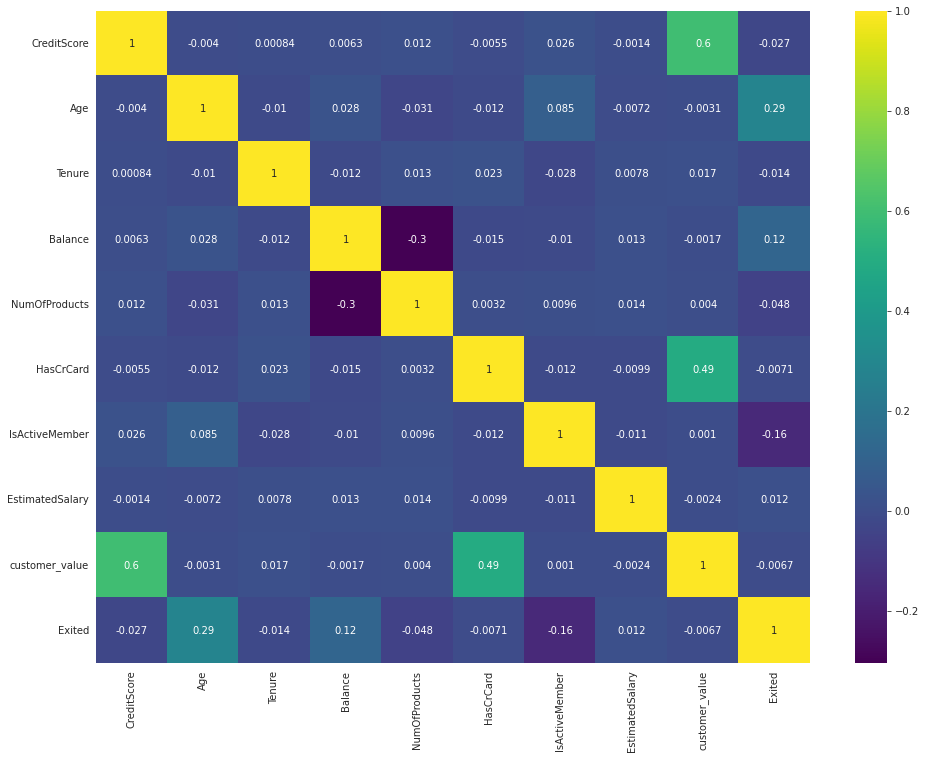

In [24]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

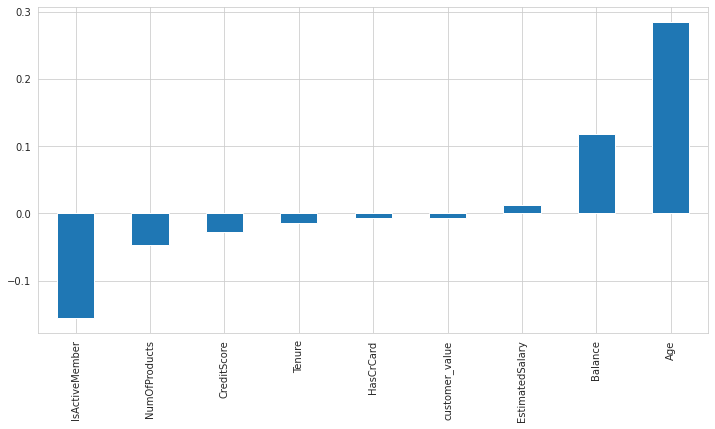

In [25]:
df.corr()['Exited'][:-1].sort_values().plot.bar()

In [26]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,customer_value,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,3,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,2,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,3,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,2,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,4,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)


In [29]:
scaler = MinMaxScaler()


In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [31]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [32]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [33]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 4s 14ms/step - loss: 0.5385 - recall: 0.0048 - val_loss: 0.4900 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 7ms/step - loss: 0.4890 - recall: 0.0000e+00 - val_loss: 0.4727 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4768 - recall: 0.0000e+00 - val_loss: 0.4600 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4680 - recall: 0.0042 - val_loss: 0.4492 - val_recall: 0.0055
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4595 - recall: 0.0133 - val_loss: 0.4387 - val_recall: 0.0331
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4512 - recall: 0.0557 - val_loss: 0.4278 - val_recall: 0.0442
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4418 - recall: 0.0672 - val_loss: 0.4161 - val_recall: 0.0884
Epoch 8/200
64/64 [=

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


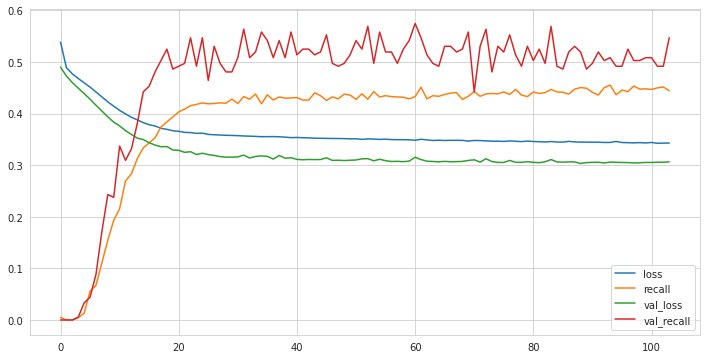

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [36]:
y_pred = model.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 1ms/step


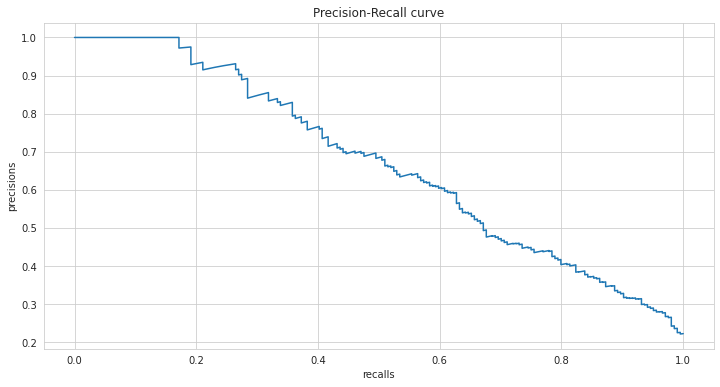

In [37]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [38]:
average_precision_score(y_test, y_pred_proba)

0.6696884870951941

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [39]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [40]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [41]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [42]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.6954 - recall: 0.2682 - val_loss: 0.6766 - val_recall: 0.6298
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6752 - recall: 0.5714 - val_loss: 0.6497 - val_recall: 0.6740
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6560 - recall: 0.5999 - val_loss: 0.6240 - val_recall: 0.6298
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6382 - recall: 0.6277 - val_loss: 0.6361 - val_recall: 0.7514
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6260 - recall: 0.6604 - val_loss: 0.6060 - val_recall: 0.6961
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6150 - recall: 0.6634 - val_loss: 0.5987 - val_recall: 0.7017
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6041 - recall: 0.6695 - val_loss: 0.6002 - val_recall: 0.7348
Epoch 8/200
64/64 [======================

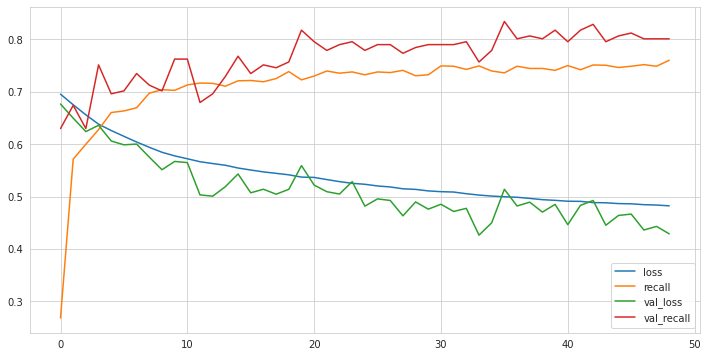

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [44]:
y_pred = model.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 2ms/step


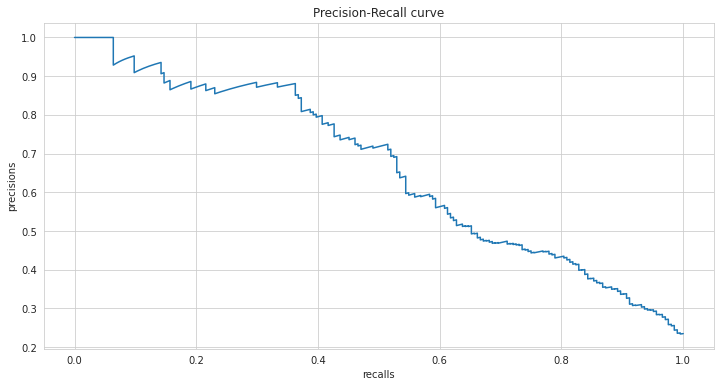

In [45]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [46]:
average_precision_score(y_test, y_pred_proba)

0.661501388438814

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

In [47]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [48]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer,
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [49]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [50]:
classifier = KerasClassifier(build_fn=build_classifier, epochs=25)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, 'rmsprop', "SGD", "adagrad", "adadelta"]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

Epoch 1/25
71/71 [==============================] - 1s 2ms/step - loss: 0.6761 - recall: 0.5319
Epoch 2/25
71/71 [==============================] - 0s 2ms/step - loss: 0.6462 - recall: 0.6465
Epoch 3/25
71/71 [==============================] - 0s 2ms/step - loss: 0.6288 - recall: 0.6765
Epoch 4/25
71/71 [==============================] - 0s 2ms/step - loss: 0.6178 - recall: 0.6748
Epoch 5/25
71/71 [==============================] - 0s 2ms/step - loss: 0.6092 - recall: 0.6798
Epoch 6/25
71/71 [==============================] - 0s 2ms/step - loss: 0.6012 - recall: 0.6956
Epoch 7/25
71/71 [==============================] - 0s 2ms/step - loss: 0.5934 - recall: 0.6972
Epoch 8/25
71/71 [==============================] - 0s 2ms/step - loss: 0.5842 - recall: 0.7076
Epoch 9/25
71/71 [==============================] - 0s 2ms/step - loss: 0.5746 - recall: 0.7119
Epoch 10/25
71/71 [==============================] - 0s 2ms/step - loss: 0.5642 - recall: 0.7218
Epoch 11/25
71/71 [====================

In [51]:
grid_model.best_score_

0.7034490871146908

In [52]:
grid_model.best_params_

{'batch_size': 128, 'optimizer': 'rmsprop'}

In [53]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[589 207]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       796
           1       0.42      0.73      0.53       204

    accuracy                           0.74      1000
   macro avg       0.67      0.73      0.67      1000
weighted avg       0.81      0.74      0.76      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 1ms/step


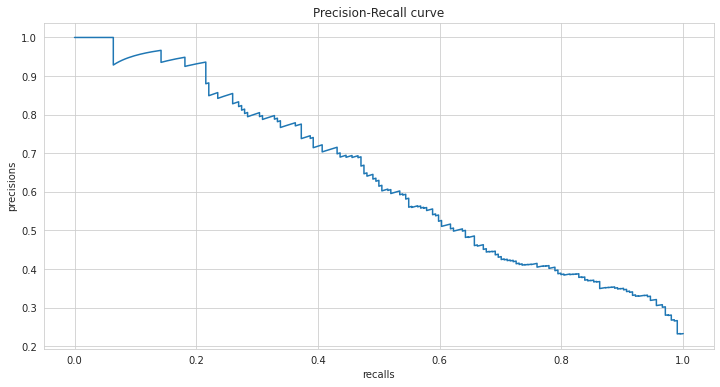

In [54]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [55]:
average_precision_score(y_test, y_pred_proba)

0.6380110925231984

# Final Model and Model Deployment

In [56]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [57]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 1s 6ms/step - loss: 0.6831 - recall: 0.2439 - val_loss: 0.6364 - val_recall: 0.3824
Epoch 2/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6591 - recall: 0.5150 - val_loss: 0.6416 - val_recall: 0.5980
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6394 - recall: 0.6241 - val_loss: 0.6111 - val_recall: 0.5735
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6244 - recall: 0.6459 - val_loss: 0.6358 - val_recall: 0.6863
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6137 - recall: 0.6759 - val_loss: 0.6040 - val_recall: 0.6275
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6058 - recall: 0.6743 - val_loss: 0.5829 - val_recall: 0.5931
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5996 - recall: 0.6798 - val_loss: 0.6083 - val_recall: 0.6765
Epoch 8/200
71/71 [======================

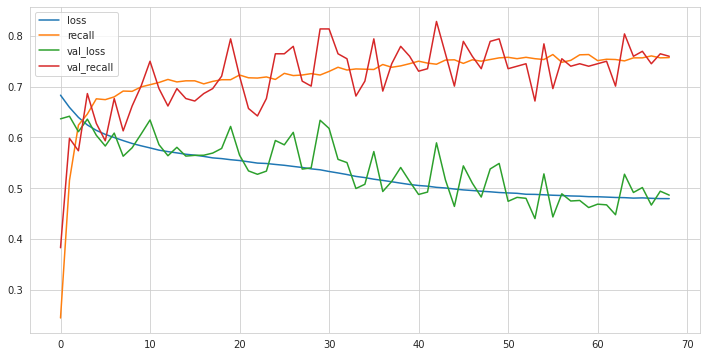

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [59]:
y_pred = model.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step


In [60]:
model.save('model_churn.h5')

## Prediction

In [61]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
customer_value           3.000
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [62]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 12))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.5       , 0.        ,
        0.        , 0.        ]])

In [63]:
model.predict(single_customer)

1/1 [==============================] - 0s 16ms/step


array([[0.5415611]], dtype=float32)

In [64]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___